EE21S061 Arihant Jain Lab 8 for EE5175 course:

In [1]:
from PIL import Image
from numpy import asarray
import cv2
import math
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

# load the image
import scipy.io
mat = scipy.io.loadmat('imageFile.mat')
# setting up parameters
rho=0.91


# Defining function to compute Transform
## 1.1 DCT Transform

The function given for computing DCT matrix is as follow:

$$ C(k,n) = \frac{1}{\sqrt{N}} , \; for \;   K = 0 $$ 

$$ C(k,n) = \sqrt {\frac{2}{N}} \cos{\frac{\pi(2n+1)k}{2N}}, \; where \; 1 \leq k \leq N-1 \;and \; 0 \leq n \leq N-1 $$ 


Based on the above equation we can compute the DCT matrix as defined in the function below. We can see that since this Transform is independent of the data its going to be applied on this is a DATA independent Transform

In [2]:
def DCT_custom(N):
    k,n=np.meshgrid(range(N),range(N))
    c=np.zeros((N,N))
    # Computing DCT values based on formula given above
    c=np.sqrt(2/N)*(np.cos(np.pi*(2*k+1)*n/(2*N)))
    # setting values for K=0 as mentioned above
    c[n==0]=np.sqrt(1/N)
    return c

In [3]:
DCT_custom(8)

array([[ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
         0.35355339,  0.35355339,  0.35355339],
       [ 0.49039264,  0.41573481,  0.27778512,  0.09754516, -0.09754516,
        -0.27778512, -0.41573481, -0.49039264],
       [ 0.46193977,  0.19134172, -0.19134172, -0.46193977, -0.46193977,
        -0.19134172,  0.19134172,  0.46193977],
       [ 0.41573481, -0.09754516, -0.49039264, -0.27778512,  0.27778512,
         0.49039264,  0.09754516, -0.41573481],
       [ 0.35355339, -0.35355339, -0.35355339,  0.35355339,  0.35355339,
        -0.35355339, -0.35355339,  0.35355339],
       [ 0.27778512, -0.49039264,  0.09754516,  0.41573481, -0.41573481,
        -0.09754516,  0.49039264, -0.27778512],
       [ 0.19134172, -0.46193977,  0.46193977, -0.19134172, -0.19134172,
         0.46193977, -0.46193977,  0.19134172],
       [ 0.09754516, -0.27778512,  0.41573481, -0.49039264,  0.49039264,
        -0.41573481,  0.27778512, -0.09754516]])

## 1.2 Markov-1 Process

The function given for computing Markov-1 matrix is as follow:

$$ R_{i,j} = \rho^{|i-j|} $$ 

for a given size of the matrix we can compute the co-variance matrix as given:

In [4]:
def markov(n,rho):
    x,y=np.meshgrid(np.arange(n),np.arange(n))
    return rho**(np.abs(x-y))

We are given $\rho=0.91$ for a matrix of size 8*8 which would result in

In [5]:
markov(8,rho)

array([[1.        , 0.91      , 0.8281    , 0.753571  , 0.68574961,
        0.62403215, 0.56786925, 0.51676102],
       [0.91      , 1.        , 0.91      , 0.8281    , 0.753571  ,
        0.68574961, 0.62403215, 0.56786925],
       [0.8281    , 0.91      , 1.        , 0.91      , 0.8281    ,
        0.753571  , 0.68574961, 0.62403215],
       [0.753571  , 0.8281    , 0.91      , 1.        , 0.91      ,
        0.8281    , 0.753571  , 0.68574961],
       [0.68574961, 0.753571  , 0.8281    , 0.91      , 1.        ,
        0.91      , 0.8281    , 0.753571  ],
       [0.62403215, 0.68574961, 0.753571  , 0.8281    , 0.91      ,
        1.        , 0.91      , 0.8281    ],
       [0.56786925, 0.62403215, 0.68574961, 0.753571  , 0.8281    ,
        0.91      , 1.        , 0.91      ],
       [0.51676102, 0.56786925, 0.62403215, 0.68574961, 0.753571  ,
        0.8281    , 0.91      , 1.        ]])

## 1.3 Walsh-Haddamard Transform

The Haddarmard Matrices are $H_n$ of size N x N where N=$2^n$, where n=1,2,3...

Where $H_n$ is computed from the base matrix $H_1$ which is :

$$H_1= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

and every other $H_n$ can be computed by iteratively computing

$$ H_n=H_{n-1} \otimes H_1 $$

In [6]:
def wal_had(n):
    H_1=np.array(([1,1],[1,-1]))*(1/np.sqrt(2))
    # to iterate over kronecker producting setting up the first term for Haddamard Matrix
    H=np.array(([1,1],[1,-1]))*(1/np.sqrt(2))
    if n==1:
        return H_1
    for i in range(1,n):
        H=np.kron(H,H_1)
    return H

In [7]:
wal_had(8)

array([[ 0.0625,  0.0625,  0.0625, ...,  0.0625,  0.0625,  0.0625],
       [ 0.0625, -0.0625,  0.0625, ..., -0.0625,  0.0625, -0.0625],
       [ 0.0625,  0.0625, -0.0625, ...,  0.0625, -0.0625, -0.0625],
       ...,
       [ 0.0625, -0.0625,  0.0625, ..., -0.0625,  0.0625, -0.0625],
       [ 0.0625,  0.0625, -0.0625, ...,  0.0625, -0.0625, -0.0625],
       [ 0.0625, -0.0625, -0.0625, ..., -0.0625, -0.0625,  0.0625]])

## 1.4 Symmetric Tridiagonal Structure

We know that 1-D DCT diagonalize a Symmetric Tridiagonal Structure which we can be represented as:

lets say for a matrix of size 4X4 we have:
$$  S=\begin{bmatrix} 1-\alpha & -\alpha & 0 &  0 \\ -\alpha & 1 & -\alpha &  0 \\ 0 & -\alpha & 1 & -\alpha \\ 0 & 0 & -\alpha & 1-\alpha \end{bmatrix}$$

The function defined below gives us the same structure for given values for alpha and n

In [8]:
def sym_tri(n,alpha):
    res=np.zeros((n,n))
    x,y=np.meshgrid(range(n),range(n))
    # difference between i j is 1 for just 1 cell away off diagonal element
    res[np.abs(x-y)==1]=-alpha
    res[np.abs(x-y)==0]=1
    # i==j are the diagonal element meaning diff is 0 setting them up as 1
    res[0,0]=1-alpha
    res[-1,-1]=1-alpha
    # setting top left and bottom right element manually
    return res

In [9]:
sym_tri(8,0.7)

array([[ 0.3, -0.7,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.7,  1. , -0.7,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.7,  1. , -0.7,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.7,  1. , -0.7,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.7,  1. , -0.7,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.7,  1. , -0.7,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.7,  1. , -0.7],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.7,  0.3]])

# Q1 Markov-1 process with covariance matrix R of size 8 × 8 and ρ = 0.91. 
Compute the Energy Packing Efficiency and De-correlation Efficiency of the Walsh-Haddamard Transform
and Discrete Cosine Transform for the above process. What is your observation about the
eigenvectors of R in relation to the DCT basis?

In [10]:
def DCT_2D(matrix):
    x, y = np.shape(matrix)
    # To compute 2-D DCT for any given matrix we can apply 1-D DCT first over column and then over row 
    C,D= DCT_custom(x),DCT_custom(y)
    # C holds column DCT and D holds row DCT 
    return C@matrix@(D.T)

# Similarly for every Transform we can basically extend the 1-D transform by computing it over column then over row
# this follows also in Walsh-Haddamard Transform
def wal_had_2D(matrix):
    x, y = np.shape(matrix)
    H_x = wal_had(int(np.ceil(np.log2(x))))
    H_y = wal_had(int(np.ceil(np.log2(y))))
    # H_x holds column Walsh Haddamard Transform and H_y holds row Walsh Haddamard Transform 
    return H_x@matrix@(H_y.T)

def Compute_EPE(matrix):
    # To compute Energy Packing Efficency we can sum the diagonal entries and then for each dropped singular value 
    # compute its cummalative sum over total
    total=np.sum(np.diag(matrix))
    return np.cumsum(np.diag(matrix))/total


def Decorrelation_eff(Matrix, Matrix_transformed):
    off_diag = 1-np.eye(np.shape(Matrix)[0])
    # Getting off-diagonal elements from Matrix
    temp1 = np.abs(off_diag*Matrix)
    temp2 = np.abs(off_diag*Matrix_transformed)
    # Evaluating for alpha and beta to be used in computing the efficency
    # where efficency = 1 - alpha / beta 
    a=np.sum(temp2)
    b=np.sum(temp1)
    return (1-(a/b))

In [11]:
R=markov(8,rho)

DCT=DCT_2D(R)
WAL=wal_had_2D(R)
epe_dct=Compute_EPE(DCT)
epe_wal=Compute_EPE(WAL)


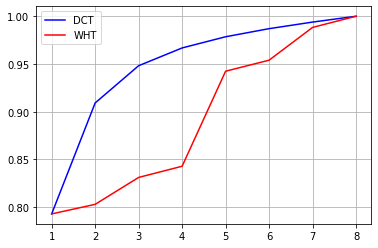

In [12]:
plt.plot(np.arange(DCT.shape[0])+1,epe_dct,'blue')
plt.plot(np.arange(WAL.shape[0])+1,epe_wal,'red')
plt.grid()
plt.legend(["DCT", "WHT"])

* DCT has more energy packing efficency for the first few eigenvectors more than WHT this means DCT eigen vector are closer to eigen vector of the data we are processing.

* Graph intially grows really fast after which its growth slows which means the latter half of the eigenvector have relatively less information then first few components.

* WHT transform gains a lot of energy efficency near 5th eigenvector which means these eigenvector had a lot of info and including them had a significant improvement.

In [13]:
Decorrelation_eff(R,DCT)

0.9804711989227338

In [14]:
Decorrelation_eff(R,WAL)

0.9485667904674058

## To see eigenvector of R 

we can print the DCT transform of the matrix R which we can compare with DCT basis.

In [15]:
np.round(DCT, decimals=2)

array([[ 6.34,  0.  , -0.29,  0.  , -0.07, -0.  , -0.02,  0.  ],
       [ 0.  ,  0.93,  0.  , -0.03,  0.  , -0.01,  0.  , -0.  ],
       [-0.29,  0.  ,  0.31,  0.  , -0.  ,  0.  , -0.  , -0.  ],
       [ 0.  , -0.03,  0.  ,  0.15,  0.  , -0.  ,  0.  , -0.  ],
       [-0.07, -0.  , -0.  ,  0.  ,  0.09,  0.  , -0.  , -0.  ],
       [-0.  , -0.01,  0.  , -0.  ,  0.  ,  0.07,  0.  , -0.  ],
       [-0.02,  0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.06, -0.  ],
       [ 0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,  0.05]])

* If the eigen vectors of R would be same as DCT basis we should have seen a purely diagonal matrix but what we see is that some values off diagonal exist this means eigen vector are close to DCT but not same.

* diagonal values in the matrix decreases from top right to bottom left this shows that first few eigen vector contains most information which is also visible in the above graph which shows the energy packing efficency of the vectors.

## Q2  

### Find $\beta^2 R^{-1}$ given $\beta^2 = \frac{1-\rho^2}{1+\rho^2}$

In [16]:
beta = np.sqrt((1-rho**2)/(1+rho**2))

In [17]:
beta

0.3066464660471657

### $\alpha = \frac{\rho}{1+\rho}$

In [18]:
alpha = rho/(1+rho**2)

In [19]:
alpha

0.4977845850883431

In [20]:
Q=sym_tri(8,alpha)

In [21]:
np.round(Q, decimals=2)

array([[ 0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  1. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  1. , -0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  1. , -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5,  1. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0.5]])

### Does $\beta^2 R^{-1}$ have a Tridiagonal Structure?

In [22]:
beta_res=(beta**2)*(np.linalg.inv(R))

In [23]:
np.round(beta_res, decimals=2)

array([[ 0.55, -0.5 , -0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ],
       [-0.5 ,  1.  , -0.5 ,  0.  , -0.  ,  0.  , -0.  ,  0.  ],
       [-0.  , -0.5 ,  1.  , -0.5 ,  0.  , -0.  ,  0.  , -0.  ],
       [-0.  , -0.  , -0.5 ,  1.  , -0.5 ,  0.  , -0.  ,  0.  ],
       [-0.  , -0.  ,  0.  , -0.5 ,  1.  , -0.5 ,  0.  , -0.  ],
       [-0.  ,  0.  , -0.  ,  0.  , -0.5 ,  1.  , -0.5 ,  0.  ],
       [ 0.  , -0.  ,  0.  ,  0.  , -0.  , -0.5 ,  1.  , -0.5 ],
       [-0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  , -0.5 ,  0.55]])

* We can verify that the above matrix does have a tridiagonal Structure which is similar to Q computed above

In [24]:
DCT_1=DCT_2D(Q)
DCT_2=DCT_2D(beta_res)

In [25]:
np.round(DCT_1, decimals=2)

array([[ 0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,  0.  ],
       [-0.  ,  0.08, -0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ],
       [-0.  , -0.  ,  0.3 ,  0.  , -0.  ,  0.  , -0.  ,  0.  ],
       [-0.  ,  0.  ,  0.  ,  0.62,  0.  , -0.  ,  0.  , -0.  ],
       [ 0.  , -0.  , -0.  ,  0.  ,  1.  ,  0.  , -0.  , -0.  ],
       [-0.  , -0.  ,  0.  , -0.  ,  0.  ,  1.38,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,  1.7 , -0.  ],
       [-0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ,  1.92]])

In [26]:
np.round(DCT_2, decimals=2)

array([[ 0.02, -0.  ,  0.01,  0.  ,  0.01,  0.  ,  0.01,  0.  ],
       [-0.  ,  0.1 , -0.  ,  0.02,  0.  ,  0.01,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.32,  0.  ,  0.01,  0.  ,  0.01,  0.  ],
       [-0.  ,  0.02, -0.  ,  0.63,  0.  ,  0.01,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.01,  0.  ,  1.01,  0.  ,  0.01,  0.  ],
       [ 0.  ,  0.01, -0.  ,  0.01,  0.  ,  1.39,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.01,  0.  ,  0.01, -0.  ,  1.71,  0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  1.92]])

* Through the diagonal values we can see that both have similar eigen values which means they are close to each other and share a similar structure

In [27]:
np.round(DCT_2-DCT_1, decimals=2)

array([[ 0.01, -0.  ,  0.01,  0.  ,  0.01,  0.  ,  0.01,  0.  ],
       [-0.  ,  0.02, -0.  ,  0.02,  0.  ,  0.01,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.02, -0.  ,  0.01,  0.  ,  0.01, -0.  ],
       [ 0.  ,  0.02, -0.  ,  0.02, -0.  ,  0.01,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.01, -0.  ,  0.01,  0.  ,  0.01,  0.  ],
       [ 0.  ,  0.01, -0.  ,  0.01, -0.  ,  0.01,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.01, -0.  ,  0.01, -0.  ,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ]])

* This can further be verified by subtracting the 2 matrices

## Q3. Performing SVD and reconstructing the matrix based on obtained eigenvectors and their values.

To  Compute SVD for a given matrix A we first find the 

* $A^TA$ and $AA^T$ and compute their eigen-value decomposition. This gives us their respective eigen values and eigen vectors.


* we know $ A = U\Sigma V$ where eigen vector of $AA^T$ are column of $U$ and eigen vector of $A^TA$ are column of $V$


* eigen values of $AA^T$ and  $A^TA$ are the diagonal values $\Sigma$

This gives us the $U$ $V$ and $\Sigma$ which we can use to recompute A 

* To Compute $A$ from $U$ $V$ and $\Sigma$ we can just compute $ U\Sigma V$ 

* We can compute  $\hat{A}_{k}$ which is $A$ computed from $U$ $V$ and $\Sigma$ but only using most significant eigen values and where k is number of eigenvector used for reconstruction.



In [28]:
g=mat['g'].astype(np.float64)

In [41]:
def SVD(matrix):
    g=matrix.astype(np.float64)
    temp1=np.matmul(g,g.T)
    temp2=np.matmul(g.T,g)
    sigmas=np.zeros_like(g)
    e_val_1,e_vec_1=sorted_eigen((temp1))
    e_val_2,e_vec_2=sorted_eigen((temp2))
    e_val_1=np.sqrt(e_val_1)
    e_val_2=np.sqrt(e_val_2)
    for i in range(min(g.shape[0],g.shape[1])):
        sigmas[i][i]=(e_val_1[i]+e_val_2[i])/2
        v=e_vec_2[:,i]
        if np.sum((g@v-sigmas[i, i]*e_vec_1[:, i])**2) > np.sum((g@v+sigmas[i, i]*e_vec_1[:, i])**2):
            e_vec_2[:, i] = -v
    return e_vec_1,sigmas,e_vec_2

def sorted_eigen(Matrix):
    eigenValues, eigenVectors = np.linalg.eig(Matrix)
    temp = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[temp]
    eigenVectors = eigenVectors[:, temp]
    return eigenValues, eigenVectors

def reconstruc_from_svd(U,sigma,V,n):
    return np.matmul(np.matmul(U[:,:n],sigma[:n,:n]),V.T[:n,:])

def exp_error(sigma):
    total=np.sum(np.diag(sigma[sigma>0]**2))
    return np.cumsum(sigma[sigma>0]**2)/total    

def error_from_svd(original,U,sigma,V):
    total=np.sum(np.diag(sigma[sigma>0]**2))
    original=original.astype(np.float64)
    x,y=original.shape
    error=[]
    twin=original.copy()
    for i in range(min(x,y)):
        twin-=sigma[i,i]*np.outer(U[:,i],V[:,i])
        error.append(np.sum((twin-original)**2)/total)
    return error


In [42]:
U,sigma,V=SVD(g)

In [43]:
g.shape

(8, 8)

In [44]:
g

array([[207., 244., 107., 173.,  70., 111., 180., 244.],
       [230., 246., 233., 193.,  11.,  97., 192.,  86.],
       [ 32.,  40., 202., 189.,  24., 195.,  70., 149.],
       [232., 247., 244., 100., 209., 202., 173.,  57.],
       [161., 244., 167., 167., 177.,  47., 167., 191.],
       [ 24., 123.,   9.,  43.,  80., 124.,  41.,  65.],
       [ 71., 204., 216., 180., 242., 113.,  30., 129.],
       [139.,  36., 238.,   8.,   8., 164., 127., 178.]])

In [45]:
reconstruc_from_svd(U,sigma,V,8)

array([[207., 244., 107., 173.,  70., 111., 180., 244.],
       [230., 246., 233., 193.,  11.,  97., 192.,  86.],
       [ 32.,  40., 202., 189.,  24., 195.,  70., 149.],
       [232., 247., 244., 100., 209., 202., 173.,  57.],
       [161., 244., 167., 167., 177.,  47., 167., 191.],
       [ 24., 123.,   9.,  43.,  80., 124.,  41.,  65.],
       [ 71., 204., 216., 180., 242., 113.,  30., 129.],
       [139.,  36., 238.,   8.,   8., 164., 127., 178.]])

In [46]:
np.max(g-reconstruc_from_svd(U,sigma,V,8))

1.0800249583553523e-12

In [47]:
reconstruc_from_svd(U,sigma,V,7)

array([[194.57258802, 249.96369227, 110.44520647, 168.82208015,
         67.99654152, 109.83024324, 188.90970236, 243.31660829],
       [234.95953048, 243.62001021, 231.62508731, 194.66732389,
         11.79954004,  97.46682642, 188.44431676,  86.2727279 ],
       [ 31.70798905,  40.14013082, 202.08095314, 188.90183006,
         23.95292408, 194.97251384,  70.20935418, 148.98394212],
       [226.292413  , 249.7389687 , 245.5822937 ,  98.08119011,
        208.07986364, 201.46276115, 177.09199449,  56.68613597],
       [172.41561484, 238.52185104, 163.83529039, 170.83776799,
        178.84034379,  48.07451919, 158.81569495, 191.6277523 ],
       [ 36.33032805, 117.08289657,   5.58170776,  47.14528161,
         81.98780731, 125.16061853,  32.15990094,  65.678053  ],
       [ 66.45034313, 206.18329878, 217.26128491, 178.47046982,
        241.26653686, 112.57175381,  33.26182866, 128.74981132],
       [142.09454949,  34.51498117, 237.14210924,   9.0403437 ,
          8.49888114, 164.2912811

In [48]:
reconstruc_from_svd(U,sigma,V,6)

array([[194.56502088, 248.25836277, 109.76891294, 169.72853635,
         69.10286021, 109.79715596, 190.93546621, 242.84557673],
       [234.92340863, 235.47959409, 228.39678996, 198.99430626,
         17.08056905,  97.30888379, 198.11433112,  84.0242516 ],
       [ 31.75303893,  50.29256541, 206.10716963, 183.50537306,
         17.36661438, 195.16949423,  58.1492596 , 151.78816101],
       [226.33189147, 258.63583176, 249.11058008,  93.35212356,
        202.30809581, 201.63538059, 166.52339551,  59.14355159],
       [172.46512853, 249.68024838, 168.26044801, 164.9065984 ,
        171.60142391,  48.29101754, 145.5606155 , 194.70982964],
       [ 36.299086  , 110.04219161,   2.78952997,  50.88772005,
         86.55540761, 125.02401279,  40.5235665 ,  63.73332953],
       [ 66.39801302, 194.39019055, 212.5844159 , 184.73901563,
        248.91722029, 112.34294062,  47.27088228, 125.49241956],
       [142.06401221,  27.63310427, 234.41291892,  12.69835817,
         12.96344303, 164.1577569

## Q4. Computing Error by removing singular values one by one.

### we know error between the original image (g) and the reconstructed image ( $\hat{A}_{k}$ ) is equal to $ ||A-\hat{A}_{k}||_{F}^{2}$ where k is number of singular values we are using

Here we are going to be computing error based on 2 methods:

* Computing error based on difference between the reconstructed image and original image

$$ ||A-\hat{A}_{k}||_{F}^{2} $$


* Computing error based on Sigma (Singular values) which are the eigen values for the data obtained by SVD

$$ ||A-\hat{A}_{k}||_{F}^{2} = \Sigma_{i=1}^{k}\sigma_{i}^{2} $$




In [49]:
exp=exp_error(sigma)

In [50]:
true_error=error_from_svd(g,U,sigma,V)

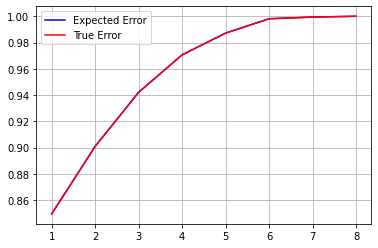

In [51]:
plt.plot(np.arange(DCT.shape[0])+1,exp,'blue')
plt.plot(np.arange(WAL.shape[0])+1,true_error,'red')
plt.grid()
plt.legend(["Expected Error", "True Error"])

### The graph is moving left to right in order of dropped singular values so 8 basically signify have dropped all the singular values that we have 100% error

* Both the error lines overlap through the graph which means theoritical error and True error are identical we can further verify this by plotting their difference

* This graph also shows how the first few eigen vectors have the most significant data as the error metric grows rapidly for the significant eigen values dropped.

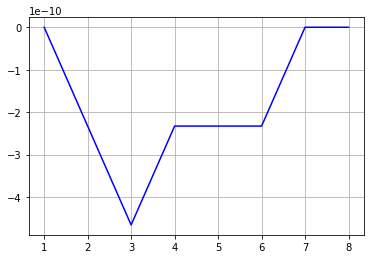

In [40]:
plt.plot(np.arange(DCT.shape[0])+1,exp-true_error,'blue')
plt.grid()

* This shows that difference between True error and Expected error is in terms of $10^{-10}$ which is really good agreement between the 2 results